# Proyek: Segmentasi Pelanggan Menggunakan RFM dan K-Means

Pada proyek ini akan akan dilakukan segmentasi pelanggan menggunakan RFM dan K-Means yang bertujuan untuk membantu bisnis dalam memahami pola perilaku pelanggan sehingga dapat mengoptimalkan strategi pemasaran dan meningkatkan retensi pelanggan.

## Penjelasan RFM dan K-Means Clustering

### 1. Apa Itu RFM?  
RFM adalah metode segmentasi pelanggan berdasarkan tiga metrik utama:  
- **Recency (R):** Seberapa baru pelanggan melakukan pembelian terakhirnya?  
- **Frequency (F):** Seberapa sering pelanggan melakukan pembelian dalam periode tertentu?  
- **Monetary (M):** Berapa total uang yang telah dibelanjakan oleh pelanggan?  

Metode ini digunakan untuk memahami perilaku pelanggan dan mengelompokkan mereka ke dalam berbagai segmen, seperti pelanggan loyal, pelanggan potensial, atau pelanggan yang hampir churn (berhenti bertransaksi).  

---

### 2. Cara Menghitung RFM  
- **Recency (R):** Hitung jumlah hari sejak transaksi terakhir pelanggan hingga tanggal referensi (misalnya, hari terakhir dalam dataset).  
  
  R = Tanggal Referensi - Tanggal Transaksi Terakhir
    
- **Frequency (F):** Hitung jumlah transaksi unik yang dilakukan pelanggan.  

  F = Jumlah transaksi unik oleh pelanggan
- **Monetary (M):** Hitung total nilai transaksi yang dilakukan pelanggan.  
  
  M = Quantity x Price

---

### 3. Apa Itu K-Means Clustering?  
K-Means adalah algoritma **unsupervised learning** yang digunakan untuk mengelompokkan data ke dalam **K kelompok** berdasarkan kesamaan pola dalam data. Algoritma ini bekerja dengan cara:  
1. **Menentukan jumlah cluster (K)**  
2. **Menginisialisasi centroid awal secara acak**  
3. **Menghitung jarak antara setiap titik data dengan centroid terdekat**  
4. **Mengelompokkan data ke centroid terdekat**  
5. **Memperbarui centroid berdasarkan rata-rata titik dalam cluster**  
6. **Mengulang langkah 3-5 hingga centroid stabil (tidak berubah banyak)**  

K-Means cocok digunakan dalam analisis RFM untuk mengelompokkan pelanggan berdasarkan pola pembelian mereka.  

---

### 4. Menggunakan RFM dengan K-Means Clustering  
Setelah menghitung skor RFM, kita dapat menggunakan **K-Means Clustering** untuk mengelompokkan pelanggan ke dalam beberapa segmen berdasarkan perilaku mereka.  

#### Langkah-langkah:  
1. **Pemahaman Data**
    - **Pemuatan data**
      - Dalam proses ini dilakukan pemuatan data dari google drive.
    - **Penilaian data**
      - pemahaman tentang deskripsi fitur, dimensi data, tipe data dari masing-masing fitur, deskripsi statistik, dan nilai yang tidak valid.

2. **Pembersihan Data**
      - **Mengubah tipe data**
        - Mengubah tipe data fitur yang tidak sesuai.
      - **Menghapus nilai kosong dan duplikat**
        - Dilakukan pengecekan dan pembersihan terhadap missing value dan duplikat pada dataset.
      - **Menghapus data yang tidak valid**
        - Data tidak valid yang termuat di fitu-fitur dihapus.
3. **Pemodelan dan Evaluasi**
      - **Membuat kolom baru**
        - Membuat kolom baru yang akan digunakan pada analisis lebih lanjut.
      - **Menghitung nilai RFM**
        - Data yang sebelumnya sudah dibersihkan selanjutnya dihitung nilai RFM-nya sehingga menghasilkan data baru, yaitu data RFM.
      - **Menghapus outlier**
        - Dilakukan pengecekan outlier menggunakan BoxPlot. Setelah itu, dilakukan penghapusan outlier dengan metode IQR (Inter Quartile Range).
      -  **Analisis Univariat**
        - Analisis Univariat digunakan untuk melihat karakteristik masing-masing fitur RFM.
      - **Transformasi Data**
        - Data RFM sering kali tidak terdistribusi normal. Oleh karena itu, biasanya dilakukan transformasi **Yeo-Johnson transformation**
        agar distribusi lebih mendekati distribusi normal. transformation** agar distribusi lebih normal.
      - **Standarisasi Data**
        - K-Means bekerja dengan baik jika fitur memiliki skala yang sama. Oleh karena itu, kita harus melakukan   **standarisasi (misalnya, menggunakan StandardScaler)** sebelum menerapkan K-Means.
    - **Menentukan Jumlah Cluster (K)**
       - Gunakan metode **Elbow Method** untuk menentukan jumlah cluster optimal.   
    - **Melakukan Clustering**
      - Terapkan K-Means ke data yang sudah distandarisasi dan tentukan setiap pelanggan masuk ke cluster mana.
    - **Mengevaluasi Model**
        - Gunakan metode atau **Silhouette Score** untuk mengevaluasi hasil clustering.
    - **Visualisasi Hasil Clustering**
      - Visualisasi hasil clustering menggunakan PCA untuk lebih mudah melihat distribusi cluster secara lebih intuitif.
    - **Interpretasi Hasil Cluster**  
   - Identifikasi karakteristik tiap cluster berdasarkan nilai RFM dan buat strategi pemasaran untuk setiap segmen pelanggan.  




Penjelasan lebih komprehensi dari masing-masing langkah-langkah tersebut diberikan sebagai berikut.

## Pemuatan dan Pemahaman Data

Data yang digunakan dalam proyek ini merupakan data sekunder yang diperoleh dari Kaggle dengan nama *dataset* yaitu 'Online Retail II Data Set from ML Repository'. Data tersebut dapat diakses melalui tautan berikut:
https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository

Berdasarkan informasi di Kaggle, variabel-variabel pada *dataset* adalah sebagai berikut:
- **InvoiceNo:** Nomor faktur. Nominal. Merupakan nomor integral 6 digit yang secara unik diberikan pada setiap transaksi. Jika nomor ini diawali dengan huruf 'c', itu menandakan transaksi tersebut adalah pembatalan (cancellation).
- **StockCode**: Kode produk (item). Nominal. Merupakan nomor integral 5 digit yang secara unik diberikan pada setiap produk yang berbeda.
- **Description**: Nama produk (item). Nominal. Merupakan deskripsi atau nama produk yang dijual dalam transaksi.
- **Quantity:** Jumlah produk (item) per transaksi. Numerik. Menunjukkan jumlah unit dari produk yang dibeli dalam setiap transaksi.
- **InvoiceDate:** Tanggal dan waktu faktur. Numerik. Menunjukkan tanggal dan waktu ketika transaksi dilakukan atau faktur dibuat.
- **UnitPrice:** Harga satuan. Numerik. Merupakan harga per unit produk dalam mata uang sterling (£).
- **CustomerID:** Nomor pelanggan. Nominal. Merupakan nomor integral 5 digit yang secara unik diberikan kepada setiap pelanggan.
- **Country:** Nama negara. Nominal. Menunjukkan nama negara tempat pelanggan tinggal atau berasal.

Agar dataset lebih dipahami, perlu dilakukan pemuatan data. Pertama, disiapkan terlebih dahulu library yang dibutuhkan.

In [83]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Mengimpor modul untuk pemrosesan data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA

# Mengimpor modul untuk pemodelan
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

Dataset yang digunakan disimpan di google drive. Untuk bisa mengakses dataset tersebut, terlebih dahulu dihubungkan google drive dan google colab sebagai berikut.

In [84]:
# Mount Google Drive untuk mengakses file dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kemudian data dimuat dari google drive ke google colab menggunakan kode berikut.

In [85]:
# Memuat Data dari Google Drive
df_1 = pd.read_excel("/content/drive/MyDrive/IdCamp/Dataset/online_retail_II.xlsx", sheet_name="Year 2009-2010") # Sheet 1
df_2 = pd.read_excel("/content/drive/MyDrive/IdCamp/Dataset/online_retail_II.xlsx", sheet_name="Year 2010-2011") # Sheet 2

Selanjutnya kedua dataset digabungkan menggunakan kode di bawah ini.

In [86]:
# Menggabungkan data
df = pd.concat([df_1, df_2], ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Dari sini terlihat ada bebarapa fitur dengen nilai tidak valid, meliputi:
- Ada StockCode yang terdiri dari 6 digit, yang seharusnya 5 digit.
- Fiitur Customer ID yang terdiri dari 6 digit dan berupa float, yang seharusnya terdiri dari 5 digit dan bertipe data string.

Sebelum melakukan analisis lebih lanjut terhadap nilai tidak valid tersebut. Dilakukan terlebih dahulu pengecekan ringkasan data.

In [87]:
# Memuat ringkaan data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


Berdasarkan output kode di atas, diketahui bahwa:

1. Ada 1067371 sampel dan 7 fitur dalam dataset.
2. Ada 4 fitur ketegory (object), yaitu Invoice, StockCode, Country.
3. Ada 4 fitur numerik (int64, datetime64[ns],float64), yaitu Quantity, InvoiceDate, Price, Customer ID.

Seperti yang sudah dikatakan sebalumnya, Customer ID harusnya merupakan fitur kategori dan mempunyai tipe data object (string). Oleh karena itu, dilakukan pengubahan tipe data Customer ID sebagai berikut.

In [88]:
# Mengubah tipe data CostumerID menjadi string
df['Customer ID'] = df['Customer ID'].apply(lambda x: str(int(x)) if pd.notna(x) else x)

Dilakukan pengecekan ringkasan data kembali.

In [89]:
# Memuat ringkasan data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 65.1+ MB
None


Terlihat bahwa Customer ID sudah bertipe data object (string). Selanjutnya, dilakukan pengecekan deskripsi statistik untuk fitur numerik sebagai berikut.

In [90]:
# Statistik Deskriptif
print(df.describe())

           Quantity                    InvoiceDate         Price
count  1.067371e+06                        1067371  1.067371e+06
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04
std    1.727058e+02                            NaN  1.235531e+02


Interpretasi:

 1. Quantity (Jumlah Barang yang Dibeli)
- **Rata-rata jumlah barang yang dibeli per transaksi**: ~9.94 unit.
- **Rentang quantity sangat luas**: dari **-80,995** hingga **80,995**.
- **Adanya nilai negatif** mungkin menunjukkan **pembatalan transaksi**.
- **Standar deviasi cukup besar (172.7)** → menunjukkan variasi tinggi dalam jumlah barang yang dibeli per transaksi.

 2. InvoiceDate (Tanggal Transaksi)
- **Rentang transaksi**: dari **1 Desember 2009** hingga **9 Desember 2011**.
- **Median transaksi terjadi sekitar Desember 2010**, menunjukkan data mencakup lebih dari 2 tahun.

 3. Price (Harga Barang)
- **Harga rata-rata per unit**: 4.65.
- **Ada harga negatif (-53,594.36)**  mungkin mengindikasikan **pengembalian dana (refund)**.
- **Harga maksimum mencapai $38,970**, menunjukkan ada produk dengan harga sangat mahal.
- **Standar deviasi cukup tinggi (123.55)** → menunjukkan variasi harga yang signifikan antara produk-produk yang dijual.
 4. Poin-Point Penting
  - Ada quantity bernilai negatif
  - Ada price bernilai negatif

## Penilaian Data

Berdasarkan hasil dari langkah-langkah diatas, diketahui:
- Terdapat Customer ID dan Description yang hilang
- Terdapat transaksi yang dibatalkan (Invoice diawali huruf 'C')
- Terdapat Quantity bernilai negatif dan Price bernilai negatif.
- Terdapat StockCode yang terdiri dari 6 digit, yang seharusnya 5 digit.

Berikut ini dilakukan pengecekan lebuh lanjut terhadap data yang tidak valid tersebut.

### Customer ID dan Description yang hilang

In [91]:
df['Customer ID'].isnull().sum()

243007

Terdapat 243007 Customer ID yang hilang.

In [92]:
df['Description'].isnull().sum()

4382

Terdapat 4382 Description yang hilang.

### Transaksi yang dibatalkan

Pertama di cek terlebih dahulu jumlah transaksi yang dibatalkan.

In [93]:
df['Invoice'] = df['Invoice'].astype(str)

num_cancellations = df[df['Invoice'].str.startswith('C')].shape[0]
print(num_cancellations)

19494


Ternyata ada 19494 transaksi yang dibatalkan.

### Quantity Negatif dan Price Negatif

Selanjutnya, dilakukan pengecekan pada data dengan Quantity negatif.

In [94]:
df[(df['Quantity'] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Dari sini terlihat bahwa sampel dengan Quantity bernilai negatif terdiri dari 22950 sampel. Selain itu, juga terlihat berberapa transaksi dengan quantity negatif mempunyai huruf "C" pada awalan Infoice-nya, yang berarti transaksi yang dibatalkan. Berikut ini, dilakukan pengecekan apakah semua sampel dengan quantity negatif merupakan sampel yang dibatalkan atau tidak

In [95]:
# Ubah tipe data kolom 'Invoice' menjadi string
df['Invoice'] = df['Invoice'].astype(str)

# Filter transaksi dengan Quantity negatif
negative_quantity = df[df['Quantity'] < 0]

# Hitung jumlah invoice yang berawalan 'C' dalam negative_quantity
num_cancellations = negative_quantity[negative_quantity['Invoice'].str.startswith('C')].shape[0]

print(f"Jumlah invoice berawalan 'C': {num_cancellations}")

Jumlah invoice berawalan 'C': 19493


Dari 22.950 sampel dengan Quantity negatif, sebanyak 19.493 sampel berasal dari transaksi yang dibatalkan. Mengingat total transaksi yang dibatalkan berjumlah 19.494, berarti hanya ada satu transaksi yang dibatalkan dengan Quantity tidak negatif.

Hal ini menunjukkan bahwa Quantity negatif kemungkinan besar digunakan sebagai penanda transaksi yang dibatalkan. Oleh karena itu, untuk memastikan analisis hanya mencakup transaksi valid, data dengan Quantity negatif perlu dihapus.

Selanjutnya, dilakukan pengecekan terhadap Price bernilai negatif.

In [96]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Transaksi ini tidak merepresentasikan perilaku pelanggan, melainkan penyesuaian keuangan terkait utang buruk. Karena analisis berfokus pada perilaku pelanggan, transaksi semacam ini sebaiknya dihapus dari dataset untuk menghindari ketidaktepatan dalam hasil analisis.

### StockCode

Dicek terlebih dahulu jumlah StockCode yang tidak terdiri dari 5 digit.

In [97]:
# Pastikan StockCode bertipe string
df['StockCode'] = df['StockCode'].astype(str)

# Filter StockCode yang terdiri dari tepat 5 angka
df_non_5_digits = df[~df['StockCode'].str.match(r'^\d{5}$')]

# Tampilkan sampel hasilnya
df_non_5_digits

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078,United Kingdom
...,...,...,...,...,...,...,...,...
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748,United Kingdom
1067317,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748,United Kingdom


Terihat bahwa:
- Ternyata ada 134986 sampel data yang StockCode-nya tidak terdiri dari 5 digit angka.
- Ada pola StockCode berupa 5 digit angka + 1 huruf yang sering muncul.

Selanjutnya, coba cek Description dari StockCode yang terdiri dari 5 digit angka + 1 huruf .

In [98]:
df[df['StockCode'].str.match(r'^\d{5}[A-Z]$', na=False)][['Invoice','StockCode','Description']].sample(10)

,Invoice,StockCode,Description
166390,505162,84519A,TOMATO CHARLIE+LOLA COASTER SET
75035,496247,84327A,PINK JUMPER LARRY THE LAMB
120582,500891,17013D,ORIGAMI ROSE INCENSE IN TUBE
638271,545901,16248B,BLUE HOLE PUNCH
425524,530060,82613D,METAL SIGN CUPCAKE SINGLE HOOK
218679,510637,37462E,"PET MUG, GOLDFISH"
475945,534178,85049D,BRIGHT BLUES RIBBONS
137854,502613,77101A,UNION FLAG WINDSOCK
1037396,579508,79066K,RETRO MOD TRAY
347921,523277,46776C,WOVEN FROST CUSHION COVER


Tidak ada yang aneh dari data di atas, Selanjutnya, coba cek Description dari StockCode yang lebih spesifik, yang digitnya berawalan 85049.

In [99]:
df[df['StockCode'].str.startswith('85049')][['Invoice','StockCode','Description']].sample(15)

,Invoice,StockCode,Description
139340,502747,85049B,LUSH GREENS RIBBONS
1057534,580983,85049H,URBAN BLACK RIBBONS
463559,533133,85049B,LUSH GREENS RIBBONS
933075,571899,85049C,ROMANTIC PINKS RIBBONS
175485,506055,85049F,BABY BOOM RIBBONS
971201,574856,85049a,TRADITIONAL CHRISTMAS RIBBONS
1040703,579777,85049H,URBAN BLACK RIBBONS
424790,529991,85049A,TRADITIONAL CHRISTMAS RIBBONS
397318,527420,85049E,SCANDINAVIAN REDS RIBBONS
289171,517541,85049C,ROMANTIC PINKS RIBBONS


Dari output tersebut diketahui bahwa:
- Ternyata tambahan satu huruf dibelakang 5 digit  angka menandakan variasi produk. Oleh karena itu, produk dengan StockCode berupa 5 digit + 1 huruf tetap perlu dipertahankan dalam analisis.
- Terjadi ketidakkonsistenan huruf stelah 5 digit angka seperti yang terlihat pada StoceKode 85049a dan 85049A, padahal kedua produk tersebut merupakan produk yang sama. Oleh karena itu, huruf kecil setelah 5 digit angka tersebut perlu diubah menjadi huruf kapital sehingga format data lebih konsisten.


Selanjutnya, dilakukan pengecekan data duplikat.

In [100]:
# Mengecek data yang terduplikat
print(df.duplicated().sum())

34335


Terlihat terdapat 34335 data duplikat. Beikut ini ditampilkan 10 data terduplikat.

In [101]:
# Menampilkan data duplikat (jika ada)
df[df.duplicated(keep=False)].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329,United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329,United Kingdom


## Pemrosesan Data

Berdasarkan proses Penilaian Data, ada beberapa hal perlu dilakukan:
1. Mempertahankan data dengan StockCode berpola 5 digit angka dan kombinasi 5 digit angka + 1 huruf (kecil/kapital)
2. Mengubah StockCode yang terdiri dari 5 digit angka + 1 huruf (kecil/kapital) sehingga menjadi 5 digit angka + 1 kapital agar format data lebih konsisten
3. Menghapus transaksi yang dibatalkan (Invoice berawalan dengan huruf 'C')
4. Menghapus Customer ID dan Description yang  hilang
5. Mempertahankan Quanitity dan Price yang bernilai positif
6. Menghapus data duplikat

In [102]:
# Filter StockCode dengan panjang 5 digit
df_5_digit = df[df['StockCode'].str.match(r'^\d{5}$')]

# Filter StockCode dengan pola 5 angka + 1 huruf
df_5_digit_1_letter = df[df['StockCode'].str.match(r'^\d{5}[a-zA-Z]$')].copy()

# Ubah huruf terakhir menjadi huruf besar
df_5_digit_1_letter['StockCode'] = (
    df_5_digit_1_letter['StockCode'].str[:-1] +  # Ambil angka 5 digit pertama
    df_5_digit_1_letter['StockCode'].str[-1].str.upper()  # Ubah huruf terakhir menjadi kapital
)

# Gabungkan kembali jika perlu
df_cleaned = pd.concat([df_5_digit, df_5_digit_1_letter])

# Cek hasil
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [103]:
# Menghapus transaksi yang dibatalkan
df_cleaned = df[~df['Invoice'].str.startswith('C')]

# Menghapus Customer ID yang  hilang
df_cleaned = df_cleaned.dropna(subset=["Customer ID"])

# Menghapus Description yang  hilang
df_cleaned = df_cleaned.dropna(subset=["Description"])

# Mempertahankan Quanitity yang positif
df_cleaned = df_cleaned[df_cleaned["Quantity"] > 0]

# Mempertahankan Price yang positif
df_cleaned = df_cleaned[df_cleaned["Price"] > 0]

# Menghapus data duplikat
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [104]:
# Menghitung dimensi data
df_cleaned.shape

(779425, 8)

Setekah dilakukan pembersihan, data terdiri dari 779425 sampel dan 8 fitur

## Pemodelan dan Evaluasi

### Membuat fitur baru

Pertama, dibuat terlebih dahulu kolom revenue.

In [105]:
# Membuat kolom baru revenue yang memuat total penjualan per trasaksi
df_cleaned["Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### Menghitung RFM

Sebelum membuat dataframe RFM, terlebih dahulu ditentukan tanggal referensi untuk menghitung recency. Ditetapkkan tgl terakhir traansaksi + 1 hari sehingga recency dari tgl terakhir tersebut bernilai 1. Lebih lanjut, agar tidak terjadi resensi bernilai 0.

In [106]:
# Menentukan Tanggal Referensi (tangal terakhir transaksi + 1 hari)
reference_date = df_cleaned["InvoiceDate"].max() + pd.Timedelta(days=1)

Setelah dua persiapan di atas, selanjutnya dibuat dataframe RFM sebaai berikut.

In [107]:
# Menghitung Metrik RFM
rfm = df_cleaned.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "Invoice": "nunique",
    "Revenue": "sum"
}).rename(columns={"InvoiceDate": "Recency", "Invoice": "Frequency", "Revenue": "Monetary"})
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


In [108]:
# Mengecek dimensi data frame rfm
rfm.shape

(5878, 3)

Terlihat bahwa dataframe rfm terdiri dari 5878 sampel dan 3 fitur. Selanjutnya, dlakukan pengecakan nilai outier dari dataframe RFM sebagai berikut.

### Mengecek dan Mengahapus Outlier

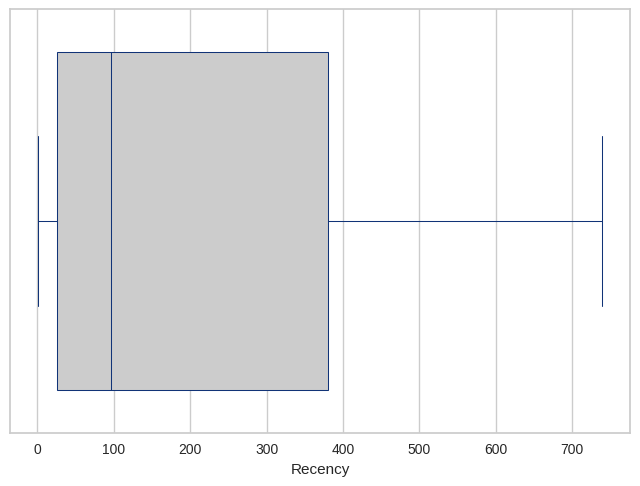

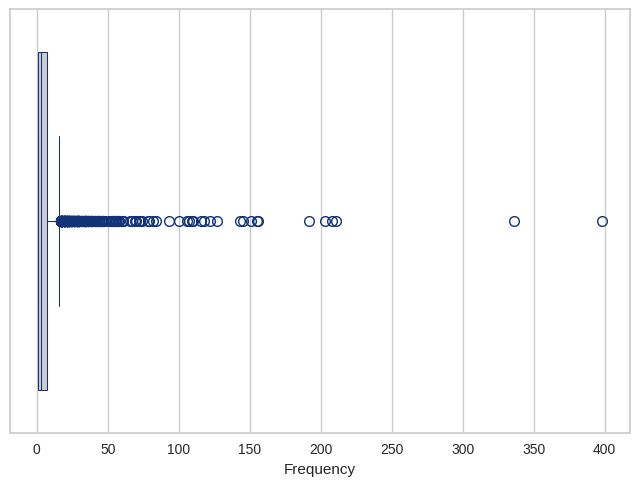

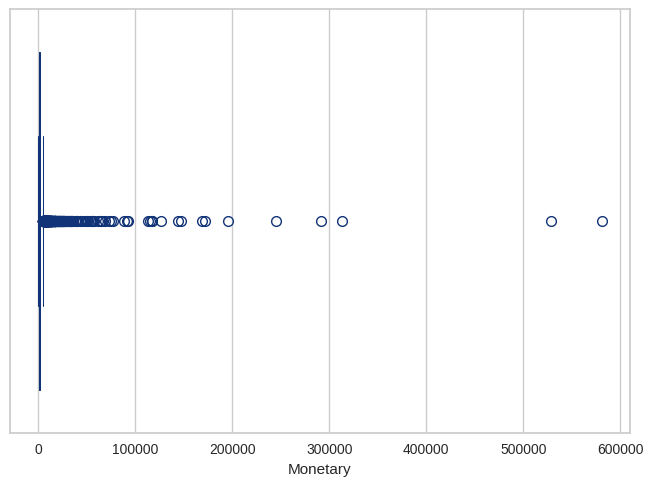

In [109]:
# Menentukan fitur numerik untuk analisis lebih lanjut
features = ["Recency", "Frequency", "Monetary"]

# Menampilkan boxplot untuk melihat distribusi dari fitur numerik dan mendeteksi outliers
for feature in features:
  plt.figure()
  sns.boxplot(data=rfm[features],
              x=feature, color=".8", linecolor="#137", linewidth=.75)

Terlihat bahwa fitur Frequency dan Monetery mempunyai outlier. Oleh karena itu, dilakukan penghapusan outlier menggunakan metode IQR (Inter Quartile Range), dengan rumus

$IQR = Q_3 - Q_1$

dengan:
*   $IQR$ = Inter Quartile Range
*   $Q_3$ = Quartile 3
*   $Q_1$ = Quartile 1

Diimplementasikan metode IQR ke dataset menggunakan kode berikut.

In [110]:
# Deteksi dan Penghapusan Outlier dengan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

rfm = remove_outliers(rfm, "Frequency")
rfm = remove_outliers(rfm, "Monetary")
print(rfm.shape)

(5001, 3)


Setelah dilakukan penghapusan outlier. Dataframe rfm terbaru terdiri dari 5001 sampel dan 3 fitur Selanjutnya dilakukan analisis univariat untuk melihat karakter masing-masing fitur.

### Analisis Univariat

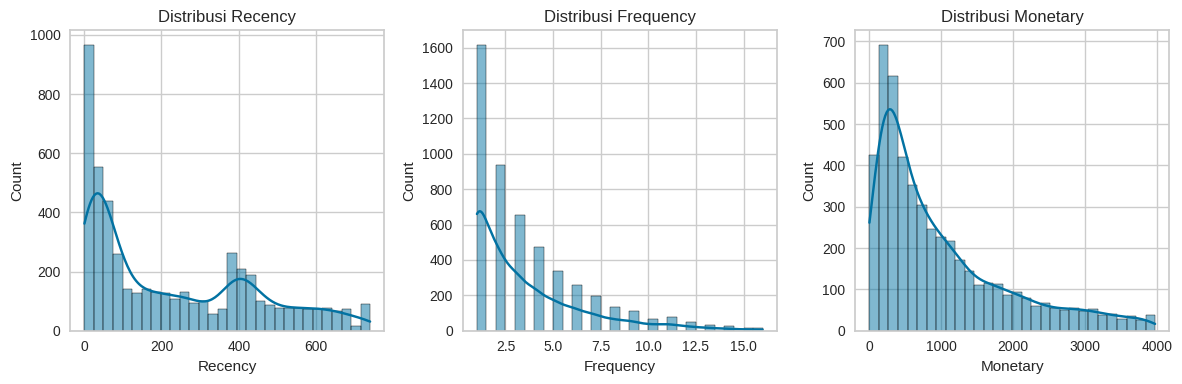

In [111]:
# Analisis Univariat
features = ['Recency', 'Frequency', 'Monetary']

# Visualisasi distribusi sebelum transformasi
plt.figure(figsize=(12,4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

Terlihat bahwa ketiga fitur memiliki distribusi yang miring ke kanan (right-skewed), yang berarti sebagian besar nilai terkonsentrasi di sisi kiri dengan ekor panjang ke kanan. Distribusi seperti ini dapat menyebabkan distorsi dalam analisis data, terutama saat menggunakan metode berbasis jarak seperti K-Means, karena fitur dengan rentang nilai besar akan lebih mendominasi. Oleh karena itu, perlu dilakukan transformasi data untuk membuat distribusi lebih mendekati normal, sehingga model dapat bekerja lebih efektif dan menghasilkan klaster yang lebih akurat.

### Transformasi dan Scaling Data

Selanjutnya, akan dilakukan:
- **Tranformasi** data menggunakan metode **Yeo-Johnson.**
- **Scaling** data menggunaan metode **StandarScaler.**

Transformasi **Yeo-Johnson** digunakan untuk menstabilkan varians dan membuat data lebih mendekati distribusi normal. Rumusnya adalah sebagai berikut:

$T(X; \lambda) =$
\begin{cases}
\frac{(X + 1)^\lambda - 1}{\lambda}, & \text{jika } \lambda \neq 0, X \geq 0 \\
\log(X + 1), & \text{jika } \lambda = 0, X \geq 0 \\
-\frac{(-X + 1)^{(2 - \lambda)} - 1}{2 - \lambda}, & \text{jika } \lambda \neq 2, X < 0 \\
-\log(-X + 1), & \text{jika } \lambda = 2, X < 0
\end{cases}

dengan:
- **$( T(X; \lambda) )$** : Hasil transformasi dari data **$X$** dengan parameter **$\lambda$**.  
- **$ X $** : Nilai asli dari data yang akan ditransformasikan.  
  - Jika **$ X \geq 0 $** → mengikuti rumus pertama atau kedua.  
  - Jika **$ X < 0 $** → mengikuti rumus ketiga atau keempat.  
- **$ \lambda $** : Parameter transformasi yang menentukan bentuk kurva perubahan data.  
  - Jika **$ \lambda = 0 $**, digunakan **log transformation**.  
  - Jika **$ \lambda = 2 $**, digunakan rumus khusus untuk **$ X < 0 $**.  
- **$ (X + 1)^\lambda $** : Bagian eksponensial yang mengubah skala data untuk **$ X \geq 0 $**.  
- **$ (-X + 1)^{(2 - \lambda)} $** : Bagian eksponensial yang digunakan untuk data negatif **$ X < 0 $**.  
- **$ \log(X + 1) $** dan **$ \log(-X + 1) $** : Transformasi logaritmik yang digunakan jika **$ \lambda = 0 $** atau **$ \lambda = 2 $**.

Dijalankan kode berikut untuk melakukan transformasi data.

In [112]:
# Yeo-Johnson Transformation
yeo_johnson = PowerTransformer(method='yeo-johnson')
rfm_transformation = yeo_johnson.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_transformation = pd.DataFrame(rfm_transformation, columns=['Recency', 'Frequency', 'Monetary'])
rfm_transformation.head()

,Recency,Frequency,Monetary
0,-0.435564,0.912535,1.161485
1,0.683849,-1.203811,-0.643432
2,0.867036,-1.203811,-0.733680
3,-0.872205,1.627788,1.571781
4,0.310803,-0.267632,-0.471586


In [113]:
# Menampilkan nilai lambda yang dipilih untuk setiap fitur
print(yeo_johnson.lambdas_)

[ 0.24985316 -0.56208266  0.16225223]


Interpretasi:
- Setiap fitur mendapatkan perlakuan transformasi yang berbeda sesuai dengan karakteristik distribusinya.
- Frequency memiliki skewness paling tinggi sehingga mendapatkan λ negatif untuk koreksi yang lebih kuat.
- Recency dan Monetary memiliki distribusi yang masih cukup mirip dengan log-normal, sehingga nilai λ-nya lebih dekat ke nol.

Berikut ini tampilan distribusi terbaru setelah dilakukan transformasi.

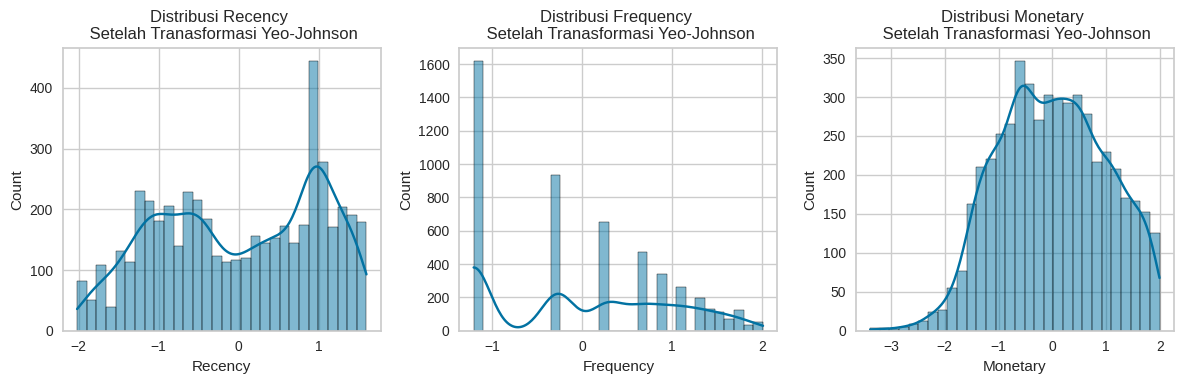

In [114]:
features_transformation = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(12,4))
for i, feature in enumerate(features_transformation, 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_transformation[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature} \n Setelah Tranasformasi Yeo-Johnson')

plt.tight_layout()
plt.show()

Terlihat bahwa kemiringan distribusi Recency dan Frequency berkurang, sementara Monetary mendekati distribusi normal.

Selanjutnya dilakukan scaling mengggunakan StandardScaler. StandardScaler mentransformasikan setiap fitur $ X $ agar memiliki **mean = 0** dan **standar deviasi = 1** yang membuat semua fitur memiliki skala yang sama, sehingga lebih cocok untuk algoritma berbasis jarak seperti **K-Means**. Rumusannnya diberikan sebagai berikut:

$
X' = \frac{X - \mu}{\sigma}
$

di mana:
- $X'$ = nilai yang sudah di scaling  
- $ X $ = nilai asli fitur  
- $ \mu $ = rata-rata fitur  
- $ \sigma $ = standar deviasi fitur

In [115]:
# Standarisasi hanya kolom yang dipilih
scaler = StandardScaler()
rfm_scaled_array = scaler.fit_transform(rfm_transformation)

# Konversi kembali ke DataFrame
rfm_transformation_scaled = pd.DataFrame(rfm_scaled_array, columns=['Recency', 'Frequency', 'Monetary'])

# Cek deskripsi statistik dataframe yang sudah di-dcaling
rfm_transformation_scaled.describe().round(2)

,Recency,Frequency,Monetary
count,5001.00,5001.00,5001.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.02,-1.20,-3.38
25%,-0.87,-1.20,-0.73
50%,0.06,-0.27,-0.02
75%,0.92,0.91,0.76
max,1.60,2.01,1.99


Terlihat semua fitur berada pada rentang nilai -3 hingga 3. Selain itu, juga mempunyai mean 0 dan standar deviasi 1.

### Menentukan nilai k yang optimal

Selanjutnya, sebelum pengklusteran, ditentukan dulu nilai k paling optimal menggunakan elbow method.

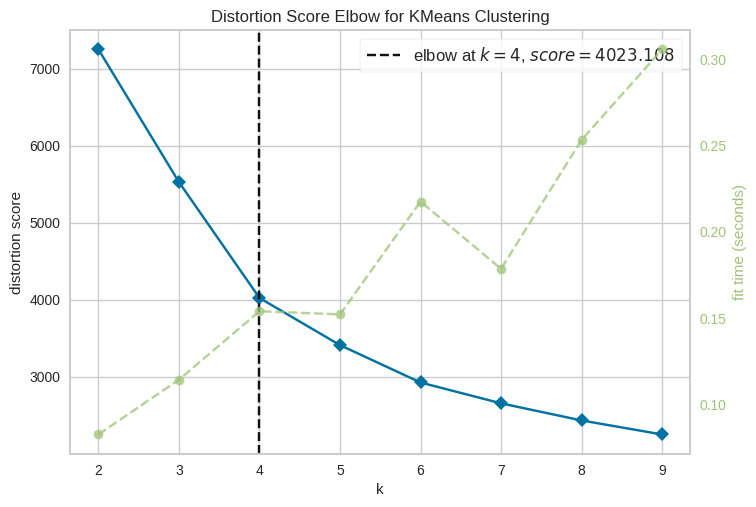

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
# Metode Elbow untuk Menentukan k Optimal
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(rfm_transformation_scaled)
visualizer.show()

Dengan demikian diperoleh nilai k optimal adalah 4.

### Clusterisasi dengan K-Means

In [117]:
# Melatih Model K-Means dengan k Optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_transformation_scaled["Cluster"] = kmeans.fit_predict(rfm_transformation_scaled)

Selanjutnya, dilakukan evalusi model menggunakan silhouette score berikut ini.

In [118]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(rfm_transformation_scaled.drop(columns=["Cluster"]), rfm_transformation_scaled["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.384075982836882


Diperoleh silhouette score sebesar  0.384075982836882, yang berarti:
- Klaster memiliki pemisahan yang cukup baik, tetapi masih ada beberapa data yang berada di dekat batas antar-klaster.
- Tidak buruk, tetapi bisa lebih baik jika dibandingkan dengan standar umum di mana Silhouette Score di atas 0.5 dianggap bagus.
- Kemungkinan ada overlap antar klaster, mungkin karena skala fitur atau jumlah klaster yang kurang optimal.

### Visualisasi cluster dengan PCA

Selanjutnya, untuk mempermudah visualisasi kluster secara lebih intuitif, maka digunakan PCA.

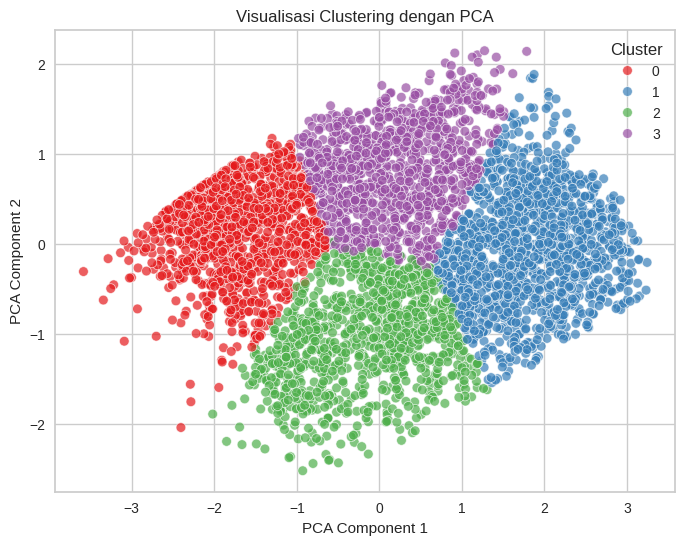

In [119]:
# Melakukan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_transformation_scaled.drop(columns=["Cluster"]))

# Membuat DataFrame hasil PCA
rfm_pca_df = pd.DataFrame(rfm_pca, columns=["PCA1", "PCA2"])
rfm_pca_df["Cluster"] = rfm_transformation_scaled["Cluster"].values

# Visualisasi clustering dengan PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_pca_df["PCA1"], y=rfm_pca_df["PCA2"], hue=rfm_pca_df["Cluster"], palette="Set1", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering dengan PCA")
plt.legend(title="Cluster")
plt.show()

Terlihat keempat cluster terpisah dengan baik.

### Interpretasi cluster

Ditambahkan terlebih dahulu kolom Cluster pada dataframe RFM.

In [120]:
# Menyaman index dengan dataframe RFM
rfm_transformation_scaled.index = rfm.index

# Menambahkan fitur Cluster pada datframe RFM
rfm["Cluster"] = rfm_transformation_scaled["Cluster"]

Selanjutnya, dihitung rata-rata RFM untuk setiap cluster sebagai berikut.

In [121]:
# Menghitung rata-rata RFM untuk setiap cluster
cluster_means = rfm.groupby("Cluster").mean()
print("Rata-rata RFM per cluster:\n", cluster_means)

Rata-rata RFM per cluster:
             Recency  Frequency     Monetary
Cluster                                    
0        447.033470   1.185109   271.359434
1         44.858177   6.909551  2036.996263
2         47.594118   1.896078   495.619844
3        323.696916   3.676652  1110.395773


Interpretasi:

- **Cluster 0: Pelanggan Loyal dengan Pembelanjaan Tinggi**  
  - **Recency (44.86 hari):** Baru saja melakukan pembelian dalam waktu relatif dekat.  
  - **Frequency (6.91 kali):** Sering berbelanja dibandingkan cluster lainnya.  
  - **Monetary (2036.99):** Rata-rata total belanja per pelanggan cukup tinggi.  

**Kesimpulan:**  
Pelanggan di cluster ini adalah pelanggan **loyal** yang sering berbelanja dan mengeluarkan banyak uang. Mereka bisa menjadi **target utama untuk program loyalitas atau penawaran eksklusif**.  



- **Cluster 1: Pelanggan Tidak Aktif dengan Pembelian Rendah**  
  - **Recency (447.03 hari):** Sudah sangat lama tidak melakukan pembelian.  
  - **Frequency (1.19 kali):** Jarang berbelanja.  
  - **Monetary (271.36):** Total belanja per pelanggan paling rendah dibanding cluster lain.  

**Kesimpulan:**  
Cluster ini berisi **pelanggan yang hampir tidak aktif** atau **mantan pelanggan**. Untuk mengaktifkan kembali mereka, strategi seperti **diskon khusus atau email re-engagement** dapat digunakan.  



- **Cluster 2: Pelanggan Berbelanja Secara Berkala dengan Pembelian Sedang**  
  - **Recency (323.70 hari):** Sudah cukup lama sejak terakhir kali melakukan pembelian.  
  - **Frequency (3.68 kali):** Kadang-kadang melakukan pembelian.  
  - **Monetary (1110.40):** Total belanja cukup tinggi.  

**Kesimpulan:**  
Pelanggan di cluster ini masih memiliki **potensi untuk diaktifkan kembali** karena mereka pernah mengeluarkan jumlah uang yang cukup besar, meskipun frekuensi belanjanya tidak tinggi. **Strategi diskon eksklusif atau personalisasi produk bisa efektif untuk menarik mereka kembali.**  



- **Cluster 3: Pelanggan Baru atau Sesekali dengan Pembelian Kecil**  
  - **Recency (47.59 hari):** Baru saja berbelanja dalam waktu relatif dekat.  
  - **Frequency (1.90 kali):** Tidak terlalu sering berbelanja.  
  - **Monetary (495.62):** Pengeluaran tidak terlalu besar.  

**Kesimpulan:**  
Pelanggan di cluster ini bisa jadi adalah **pelanggan baru atau sesekali**. Untuk meningkatkan keterlibatan mereka, bisa diberikan **program welcome reward atau promo yang mendorong mereka untuk kembali berbelanja lebih sering**.


**Kesimpulan Umum & Strategi**  

| **Cluster** | **Karakteristik** | **Strategi Pemasaran** |
|------------|------------------|----------------------|
| **0** | Pelanggan loyal, sering berbelanja, pengeluaran tinggi | Program loyalitas, VIP deals, rekomendasi produk eksklusif |
| **1** | Pelanggan lama yang tidak aktif, pembelian rendah | Email re-engagement, diskon khusus untuk menarik kembali pelanggan |
| **2** | Pelanggan yang pernah aktif dengan pembelanjaan besar | Penawaran personalisasi, promo eksklusif untuk meningkatkan frekuensi pembelian |
| **3** | Pelanggan baru atau sesekali | Welcome rewards, program referral, promo first-time buyer |

Dengan memahami karakteristik masing-masing cluster, dapat diterapkan strategi pemasaran yang lebih efektif dan **memaksimalkan retensi serta nilai pelanggan**.